In [1]:
import gensim
import pyLDAvis
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
gensim.__version__

'3.8.1'

In [3]:
pyLDAvis.__version__

'2.1.2'

##Data

In [4]:
def generate():
    sentences = []
    for i in range(100000):
        start = np.random.randint(0,20)
        finish = start + np.random.randint(2,10)
        sentence = [str(x) for x in range(start, finish)]
        sentences.append(sentence)
    return sentences

In [7]:
sentences = generate()
sentences[:10]

[['1', '2', '3', '4', '5', '6', '7', '8'],
 ['13', '14', '15', '16', '17', '18', '19'],
 ['14', '15', '16', '17', '18', '19', '20', '21', '22'],
 ['9', '10', '11', '12', '13', '14', '15'],
 ['12', '13', '14', '15', '16', '17', '18', '19', '20'],
 ['6', '7', '8', '9', '10', '11', '12', '13'],
 ['8', '9', '10'],
 ['17', '18', '19', '20', '21', '22'],
 ['5', '6', '7', '8'],
 ['6', '7', '8', '9', '10', '11']]

In [9]:
model = Word2Vec(sentences, size=10, window=5, min_count=1) 
#window - sliding by sequence and search for words,size - numer of dimensions, min count-minimal word occurence

In [10]:
model.wv['1'] #probability 

array([ 3.2409823 ,  0.9740308 , -1.7596139 , -0.7354103 , -2.4238834 ,
        0.48192894,  1.3060608 , -0.06929078,  0.5178152 , -3.8428164 ],
      dtype=float32)

In [17]:
def plot_heatmap(model):
    plt.figure(figsize=(14, 10))
    sns.heatmap(model.wv[model.wv.vocab])

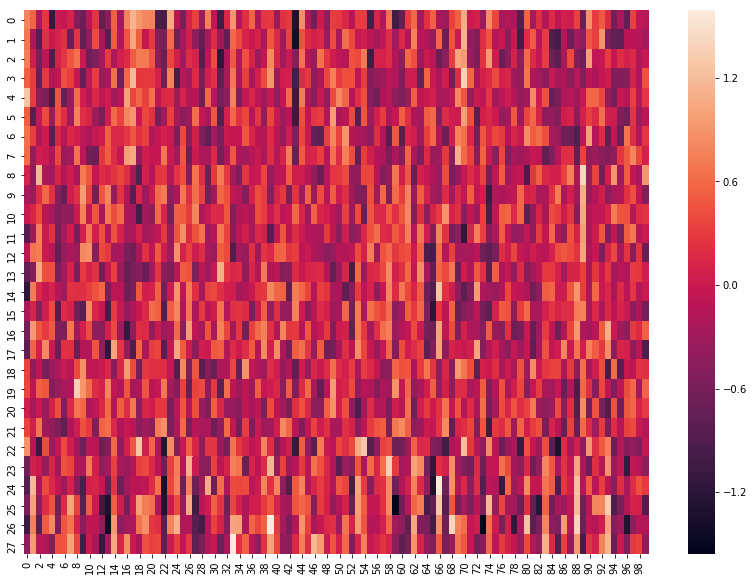

In [18]:
plot_heatmap(Word2Vec(sentences, size=100, window=1))

PCA

In [19]:
X = model.wv[model.wv.vocab]
pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)  #reduction dimentions

In [20]:
result[:,0]

array([-1.5706911 , -1.6825957 , -2.535611  , -2.6883595 , -3.1669195 ,
       -3.288093  , -3.5497062 , -3.886249  , -2.298172  , -1.3377085 ,
       -0.5458982 , -0.01720908,  1.0948334 ,  2.3650446 ,  3.0610383 ,
        3.68124   ,  3.61238   ,  3.753275  , -4.7023444 , -3.8555205 ,
       -3.5494087 , -3.4119697 , -0.2983928 ,  4.2728186 ,  4.4797926 ,
        5.3361545 ,  6.050337  ,  4.6779346 ], dtype=float32)

In [21]:
model.wv.vocab

{'1': <gensim.models.keyedvectors.Vocab at 0x202ebed7f28>,
 '2': <gensim.models.keyedvectors.Vocab at 0x202ebed9208>,
 '3': <gensim.models.keyedvectors.Vocab at 0x202ebed9630>,
 '4': <gensim.models.keyedvectors.Vocab at 0x202ebed9860>,
 '5': <gensim.models.keyedvectors.Vocab at 0x202ebed9438>,
 '6': <gensim.models.keyedvectors.Vocab at 0x202ebed97f0>,
 '7': <gensim.models.keyedvectors.Vocab at 0x202ebed96a0>,
 '8': <gensim.models.keyedvectors.Vocab at 0x202ebed9ba8>,
 '13': <gensim.models.keyedvectors.Vocab at 0x202ebed9278>,
 '14': <gensim.models.keyedvectors.Vocab at 0x202ebed9400>,
 '15': <gensim.models.keyedvectors.Vocab at 0x202ebed9c18>,
 '16': <gensim.models.keyedvectors.Vocab at 0x202ebed9780>,
 '17': <gensim.models.keyedvectors.Vocab at 0x202ebed94a8>,
 '18': <gensim.models.keyedvectors.Vocab at 0x202ebed9a58>,
 '19': <gensim.models.keyedvectors.Vocab at 0x202ebed96d8>,
 '20': <gensim.models.keyedvectors.Vocab at 0x202ebed94e0>,
 '21': <gensim.models.keyedvectors.Vocab at 0x20

In [22]:
def plot_pca(model):
    Word2Vec(sentences, size=10, window=5, min_count=1) 
    plt.figure(figsize=(7,7))
    plt.scatter(result[:,0,], result[:,1])

    words = list(model.wv.vocab)
    for i,word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i,1]))

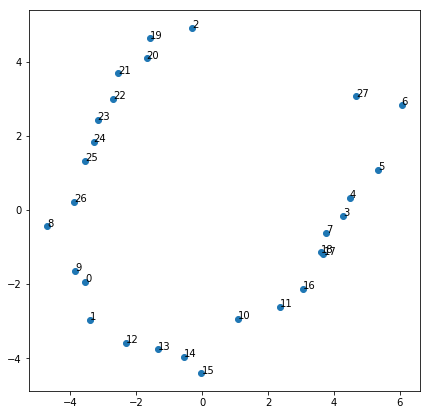

In [23]:
plot_pca(Word2Vec(generate(),size=50, window=3))

Similar words

In [24]:
model = Word2Vec(sentences, size=300, window=6)

In [25]:
model.wv.most_similar('12', topn=5)

[('11', 0.35414859652519226),
 ('10', 0.35368311405181885),
 ('9', 0.3310971260070801),
 ('13', 0.3244597911834717),
 ('14', 0.32341378927230835)]

In [27]:
model.wv.most_similar(positive=['10', '8'], negative=['25'], topn=5)

[('12', 0.4897650480270386),
 ('11', 0.4857935905456543),
 ('9', 0.46320849657058716),
 ('7', 0.41565370559692383),
 ('6', 0.40667760372161865)]